<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

#  Data Science and AI
## Lab 7.2: Random Forests

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find and answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.7419
    - **ROC AUC**  = 0.6150
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first stp is to idenfy the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, labour and iteractive processes. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh 
        Department of Information Management 
        Chung-Hua University, 
        Hsin Chu, Taiwan 30067, R.O.C. 

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper: 

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

In [1]:
# Find the dataset described above ....HINT: Dataset name is transfusion.data !!!
# Hint: search for it through the UCI Machine Learning Repository
# ANSWER : https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [2]:
# Import libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.tree import plot_tree

In [3]:
# Read data in pandas
data = pd.read_csv('transfusion.data')
# Check data has loaded correctly
# Check the first 5 rows of the dataset
data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [4]:
# Check last 8 rows of the dataframe
data.tail()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
743,23,2,500,38,0
744,21,2,500,52,0
745,23,3,750,62,0
746,39,1,250,39,0
747,72,1,250,72,0


In [5]:
# Check the shape of the dataframe (Rows, Columns)
data.shape

(748, 5)

In [6]:
# BRIEF SUMMARY OF THE DATASET
# Number of features
print('- Number of features: %d' % data.shape[1])
for c in data.columns:
    print('  - %s' % c)

# Data types
print('\n- Data types')
print(data.dtypes)

# Domains, Intervals
print('\n- Domains, Intervals')
for c in data.columns:
    x = data[c].unique()
    x.sort()
    print('  - %-16s: min: %d, max: %d' % (c, data[c].min(), data[c].max()))
    print('    values: %s' % x)

print('\n- Nulls')
for c in data.columns:
    print('  - %-16s: Nulls: %d' % (c, data[c].isna().sum()))

- Number of features: 5
  - Recency (months)
  - Frequency (times)
  - Monetary (c.c. blood)
  - Time (months)
  - whether he/she donated blood in March 2007

- Data types
Recency (months)                              int64
Frequency (times)                             int64
Monetary (c.c. blood)                         int64
Time (months)                                 int64
whether he/she donated blood in March 2007    int64
dtype: object

- Domains, Intervals
  - Recency (months): min: 0, max: 74
    values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21 22 23 25
 26 35 38 39 40 72 74]
  - Frequency (times): min: 1, max: 50
    values: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 26 33 34 38 41 43 44 46 50]
  - Monetary (c.c. blood): min: 250, max: 12500
    values: [  250   500   750  1000  1250  1500  1750  2000  2250  2500  2750  3000
  3250  3500  3750  4000  4250  4500  4750  5000  5250  5500  5750  6000
  6500  8250  8500  9500 10

# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [7]:
# Perform EDA by investigating each of the points above 
data.dtypes

Recency (months)                              int64
Frequency (times)                             int64
Monetary (c.c. blood)                         int64
Time (months)                                 int64
whether he/she donated blood in March 2007    int64
dtype: object

In [8]:
# List all the column names
data.columns.to_list()

['Recency (months)',
 'Frequency (times)',
 'Monetary (c.c. blood)',
 'Time (months)',
 'whether he/she donated blood in March 2007']

In [9]:
data.columns

Index(['Recency (months)', 'Frequency (times)', 'Monetary (c.c. blood)',
       'Time (months)', 'whether he/she donated blood in March 2007'],
      dtype='object')

In [10]:
# Get a summary explanation of the columns of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [11]:
# Get a summary statistics of the numerical columns of the dataset, which is all columns!
data.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [12]:
# Check for null values of each column
data.isnull().sum()

Recency (months)                              0
Frequency (times)                             0
Monetary (c.c. blood)                         0
Time (months)                                 0
whether he/she donated blood in March 2007    0
dtype: int64

In [13]:
# Check the number of null values of the WHOLE dataset...0 (ZERO) means NO missing Values!
data.isnull().sum().sum()

0

In [14]:
# finding the range of values
min_max = {}
for i in data.columns:
    val_max = data[i].max()
    val_min = data[i].min()
    min_max[i] = [val_min,val_max]
    
for i in min_max:
    print(f'{i}  min = {min_max[i][1]}, max = {min_max[i][0]}')

Recency (months)  min = 74, max = 0
Frequency (times)  min = 50, max = 1
Monetary (c.c. blood)  min = 12500, max = 250
Time (months)  min = 98, max = 2
whether he/she donated blood in March 2007  min = 1, max = 0


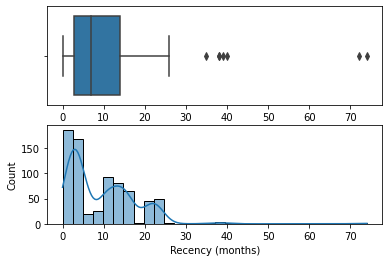

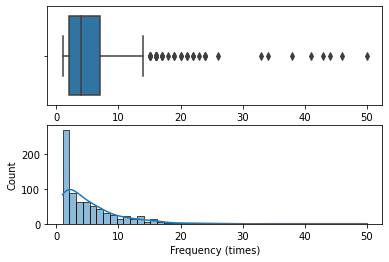

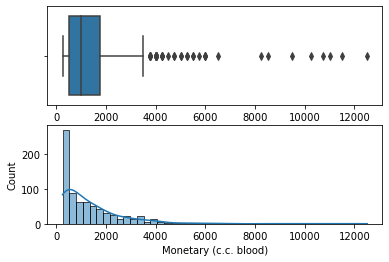

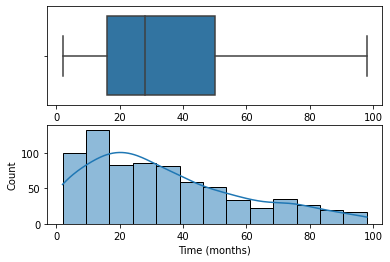

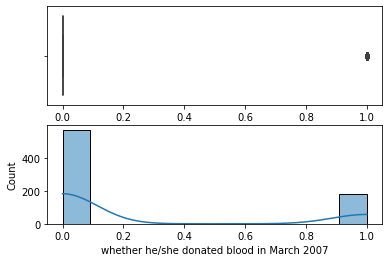

In [15]:
# Create a graphical picture explanation of the columns in this dataset 
for i in data.columns:
    fig, axs = plt.subplots(2)
    ax_box = axs[0]
    ax_box = sns.boxplot(x = data[i], ax = ax_box)
    ax_hist = axs[1]
    ax_hist = sns.histplot(x = data[i], ax = ax_hist, kde = True)
    plt.show()

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [16]:
# Answer:
# Varies as per each problem and modelling.
# No especific action is necessary initially.

In [17]:
# Filter/subset/clean the data according to your EDA findings

In [18]:
# Lets find the range of values for each column first
min_max = {}
for i in data.columns:
    val_max = data[i].max()
    val_min = data[i].min()
    min_max[i] = [val_min,val_max]
    
for i in min_max:
    print(f'{i}  min = {min_max[i][1]}, max = {min_max[i][0]}')

Recency (months)  min = 74, max = 0
Frequency (times)  min = 50, max = 1
Monetary (c.c. blood)  min = 12500, max = 250
Time (months)  min = 98, max = 2
whether he/she donated blood in March 2007  min = 1, max = 0


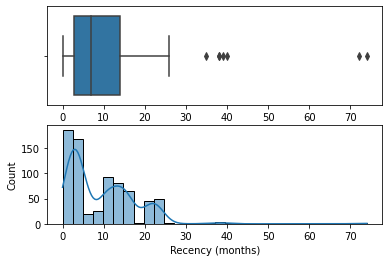

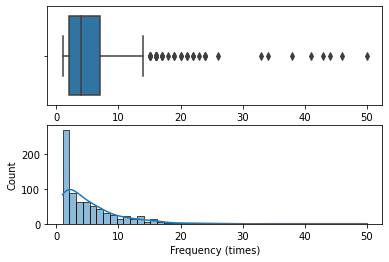

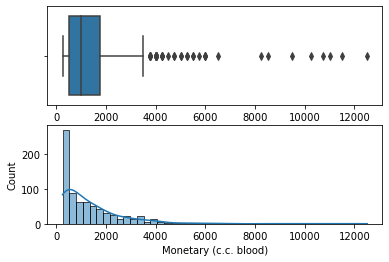

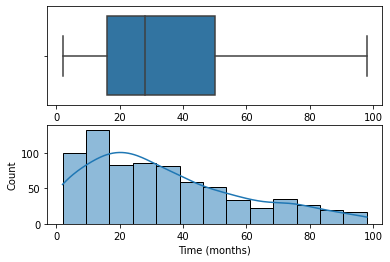

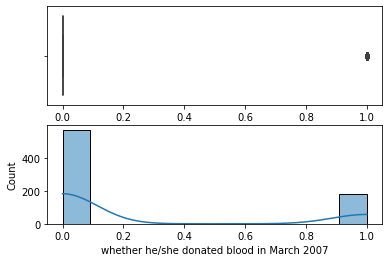

In [19]:
# Plot the graphs of all the data columns
for i in data.columns:
    fig, axs = plt.subplots(2)
    ax_box = axs[0]
    ax_box = sns.boxplot(x = data[i], ax = ax_box)
    ax_hist = axs[1]
    ax_hist = sns.histplot(x = data[i], ax = ax_hist, kde = True)
    plt.show()

/Users/christophertloo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/christophertloo/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/christophertloo/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyw

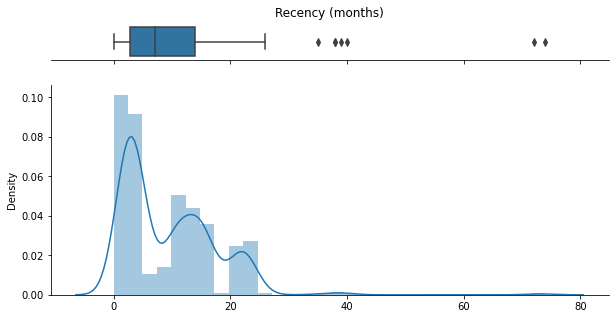

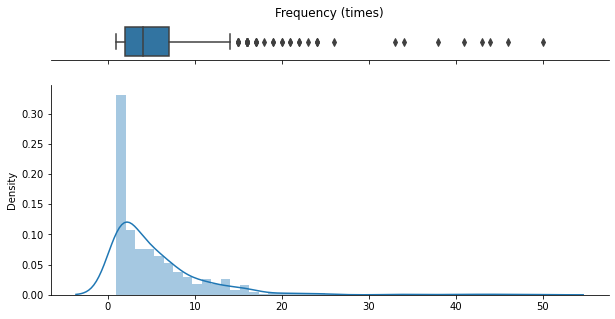

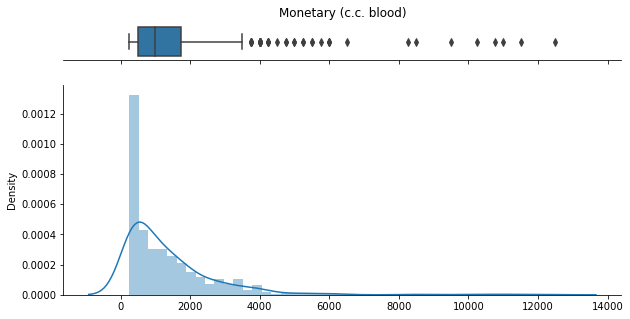

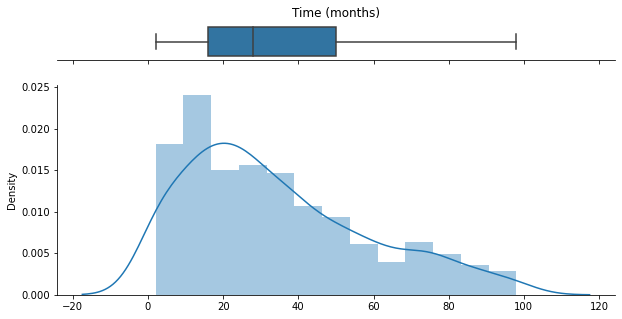

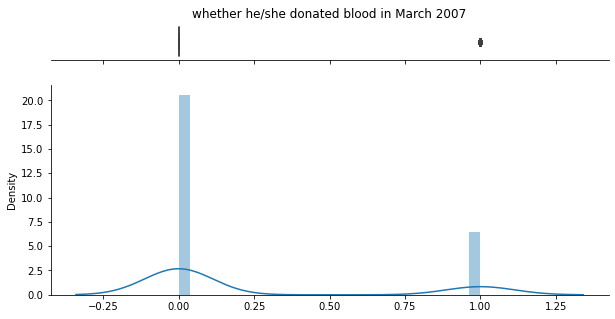

In [20]:
# Alternative code to Check for Outliers
for c in data.columns:
    fig, ax = plt.subplots(2, 
                           figsize = (10, 5),
                           sharex = True, 
                           gridspec_kw = {'height_ratios': (0.15, 0.85)})

    ax_box = ax[0]
    ax_box = sns.boxplot(data[c], ax = ax_box)
    ax_box.set(title = c, yticks = [], xlabel = '')
    sns.despine(ax = ax_box, left = True)
    
    ax_hist = ax[1]
    
    if c == 'Donated_Mar_2007':       
        ax_hist = sns.distplot(data[c], kde=False, ax = ax_hist)
        ax_hist.set(xlabel = '')
        sns.despine(ax = ax_hist)
    else:
        ax_hist = sns.distplot(data[c], ax = ax_hist)
        ax_hist.set(xlabel = '')
        sns.despine(ax = ax_hist)
        
plt.show()

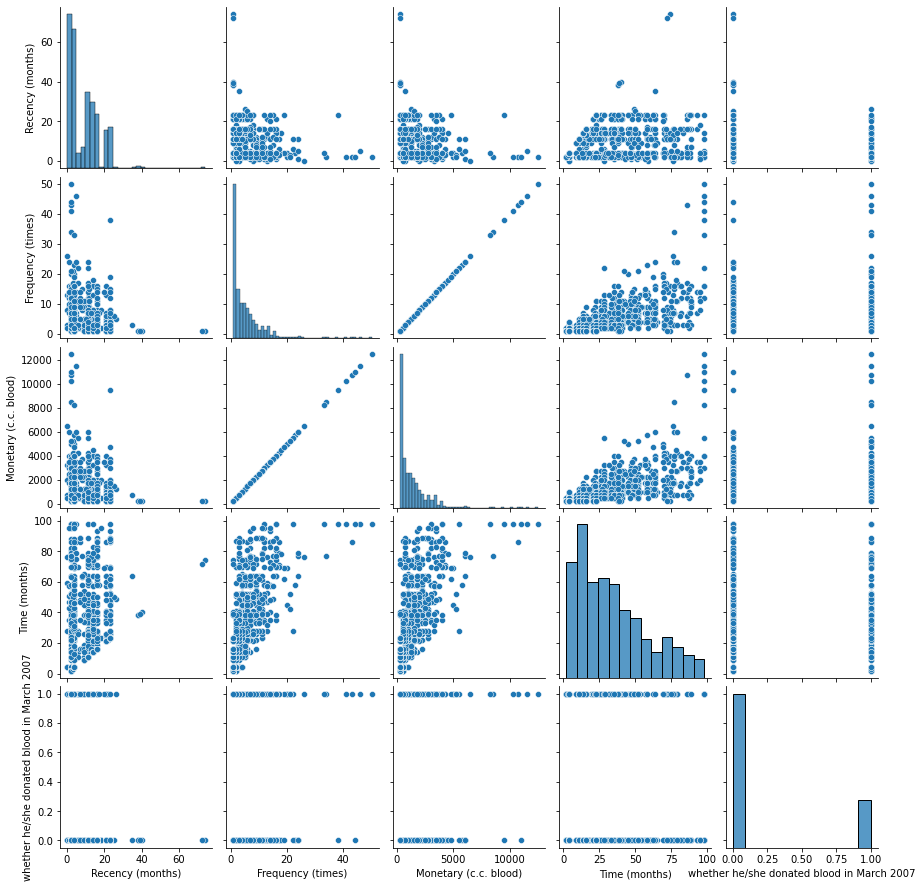

In [21]:
# Visualise features in pairs
sns.pairplot(data)
plt.show()

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [22]:
#  Lets label which are the features and which is the outcome(target):
features = ['Recency (months)',
 'Frequency (times)',
 'Monetary (c.c. blood)',
 'Time (months)']

outcome = 'whether he/she donated blood in March 2007'

In [23]:
# Define your X (input) and y (output) variables
X = data.drop(columns =['whether he/she donated blood in March 2007'])
y = data['whether he/she donated blood in March 2007'].astype(str)

In [24]:
print('- What are the input variables (features)?')
print('  - %s' % ', '.join(features))
print('- Is there an output variable (label)?')
print('  - %s' % ('Yes' if outcome else 'No'))
print('- If there is an output variable:')
print('    - Which one is it?')
print('      - %s' % outcome)
print('    - What is its type?')
print('      - %s' % y.dtypes)
print('  - What type of Modelling is it?')
print('    - [%s] Supervised' % ('x' if outcome else ' '))
print('    - [%s] Unsupervised' % (' ' if outcome else 'x'))
print('  - What type of Modelling is it?')
print('    - [%s] Regression' % ('x' if y.dtypes != 'object' else ' '))
print('    - [%s] Classification (binary)' % ('x' if (y.dtypes == 'object') and (len(y.unique()) == 2) else ' '))
print('    - [%s] Classification (multi-class)' % ('x' if (y.dtypes == 'object') and (len(y.unique()) != 2) else ' '))
print('    - [%s] Clustering' % (' ' if outcome else 'x'))

- What are the input variables (features)?
  - Recency (months), Frequency (times), Monetary (c.c. blood), Time (months)
- Is there an output variable (label)?
  - Yes
- If there is an output variable:
    - Which one is it?
      - whether he/she donated blood in March 2007
    - What is its type?
      - object
  - What type of Modelling is it?
    - [x] Supervised
    - [ ] Unsupervised
  - What type of Modelling is it?
    - [ ] Regression
    - [x] Classification (binary)
    - [ ] Classification (multi-class)
    - [ ] Clustering


In [25]:
# Answer:
#  This is a Supervised Regression Modelling!

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [26]:
# Get the whole 'shape' of the dataset (Rows, Columns)
print(data.shape)

(748, 5)


In [27]:
# Split your data... divide it into training and testing data subsets:
X = data.drop(columns =['whether he/she donated blood in March 2007'])
y = data['whether he/she donated blood in March 2007']

# The code to divide it into training and testing data subsets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [28]:
# Lets check the split of the training and testing subsets
print(f'X_train size = {len(X_train)}')
print(f'X_test size = {len(X_test)}')
print(f'y_train size = {len(y_train)}')
print(f'y_test size = {len(y_test)}')

X_train size = 501
X_test size = 247
y_train size = 501
y_test size = 247


# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [29]:
# Choose a model or models
#base model
model = RandomForestClassifier()

# Step 9: Fit the Model

In [30]:
# Fit model
model.fit(X_train, y_train)

RandomForestClassifier()

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [31]:
# Evaluate model against training set
y_train_pred = model.predict(X_train)
y_train_pred_prob = model.predict_proba(X_train)

In [32]:
train_tn, train_fp, train_fn, train_tp = metrics.confusion_matrix(y_train, y_train_pred).ravel()
train_cm = pd.DataFrame(index = ['Predicted Positive', 'Predicted Negative'], columns = ['Actual Positive', 'Actual Negative'])
train_cm.iloc[0,0] = train_tp
train_cm.iloc[0,1] = train_fp
train_cm.iloc[1,0] = train_fn
train_cm.iloc[1,1] = train_tn
train_cm

,Actual Positive,Actual Negative
Predicted Positive,92,5
Predicted Negative,29,375


In [33]:
accuracy_score = metrics.accuracy_score(y_train, y_train_pred)
accuracy_score
print('Accuracy score is :',accuracy_score * 100,'%')

Accuracy score is : 93.21357285429141 %


In [34]:
recall_score = metrics.recall_score(y_train, y_train_pred)
recall_score
print('Recall score is :',recall_score * 100,'%')

Recall score is : 76.03305785123968 %


In [35]:
fpr, tpr, _ = metrics.roc_curve(y_train, y_train_pred)
train_rocauc = metrics.auc(fpr,tpr)

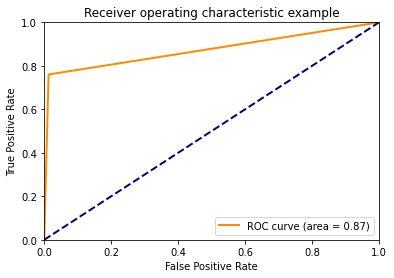

In [36]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'ROC curve (area = %0.2f)' % train_rocauc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()

In [37]:
accuracy_score

0.9321357285429142

In [54]:
def show_summary_report(actual, prediction, probabilities):

    if isinstance(actual, pd.Series):
        actual = actual.values.astype(int)
    prediction = prediction.astype(int)

    print('Accuracy : %.4f [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0' % metrics.accuracy_score(actual, prediction))
    print('Precision: %.4f [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0' % metrics.precision_score(actual, prediction))
    print('Recall   : %.4f [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0' % metrics.recall_score(actual, prediction))
    print('ROC AUC  : %.4f                                                                     Best: 1, Worst: < 0.5' % metrics.roc_auc_score(actual, probabilities[:, 1]))
    print('-' * 107)
    print('TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples')

    # Confusion Matrix
    mat = metrics.confusion_matrix(actual, prediction)

    # Precision/Recall
    precision, recall, _ = metrics.precision_recall_curve(actual, prediction)
    average_precision = metrics.average_precision_score(actual, prediction)
    
    # Compute ROC curve and ROC area
    fpr, tpr, _ = metrics.roc_curve(actual, probabilities[:, 1])
    roc_auc = metrics.auc(fpr, tpr)


    # plot
    fig, ax = plt.subplots(1, 3, figsize = (18, 6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)

    # Confusion Matrix
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])

    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True label')
    ax[0].set_ylabel('Predicted label')
    
    # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()

In [55]:
y_train_pred = model.predict(X_train)
y_train_prob = model.predict_proba(X_train)

In [56]:
model.score(X_train, y_train)

0.9321357285429142

Accuracy : 0.9321 [TP / N] Proportion of predicted labels that match the true labels. Best: 1, Worst: 0
Precision: 0.9485 [TP / (TP + FP)] Not to label a negative sample as positive.        Best: 1, Worst: 0
Recall   : 0.7603 [TP / (TP + FN)] Find all the positive samples.                     Best: 1, Worst: 0
ROC AUC  : 0.9668                                                                     Best: 1, Worst: < 0.5
-----------------------------------------------------------------------------------------------------------
TP: True Positives, FP: False Positives, TN: True Negatives, FN: False Negatives, N: Number of samples


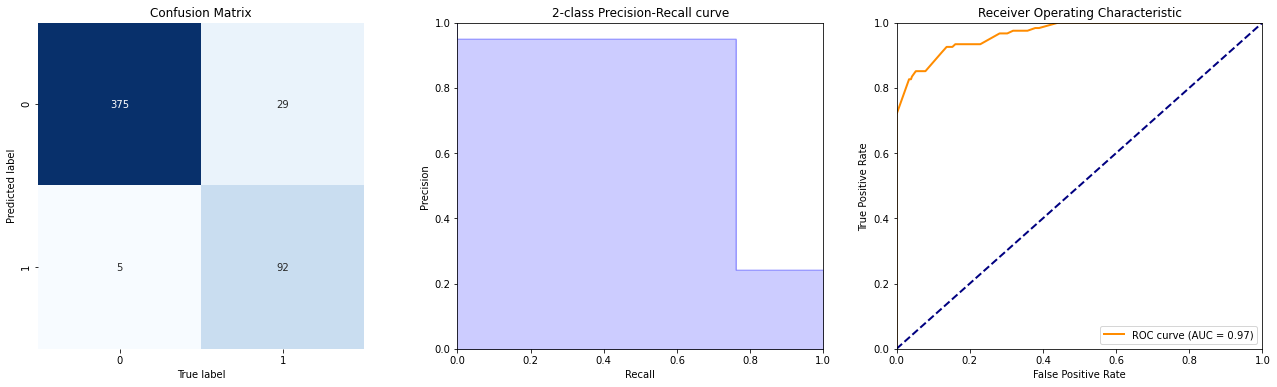

In [57]:
show_summary_report(y_train, y_train_pred, y_train_prob)

# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [ ]:
# Evaluate model against test set
y_test_pred = model.predict(X_test)
y_test_pred_prob = model.predict_proba(X_test)

In [ ]:
model.score(X_test, y_test)

In [ ]:
show_summary_report(y_test, y_test_pred, y_test_pred_prob)

In [ ]:
height = pd.DataFrame(model.feature_importances_)

In [ ]:

plt.bar(X.columns, height[0].sort_values(ascending=False));

# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

In [ ]:
# The model can be used to answer (predict) if a person makes a donation in March of 2007.

>

>

>



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



